In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from shapely.geometry import mapping
import numpy as np
import numpy.ma as ma
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

data = et.data.get_data('cold-springs-fire')

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))


In [2]:
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [3]:
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016070701T1-SC20180214145604",
                                      "crop")

glob(os.path.join(landsat_post_fire_path, "*"))

['cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_pixel_qa_crop.tif',
 'c

In [4]:
glob(os.path.join(landsat_post_fire_path, "*.tif"))

['cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_pixel_qa_crop.tif',
 'c

In [5]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[1-7]*.tif"))
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band2_crop.tif']

In [6]:
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band7_crop.tif']

In [7]:
def open_clean_band(band_path):
    return rxr.open_rasterio(band_path, masked=True).squeeze()

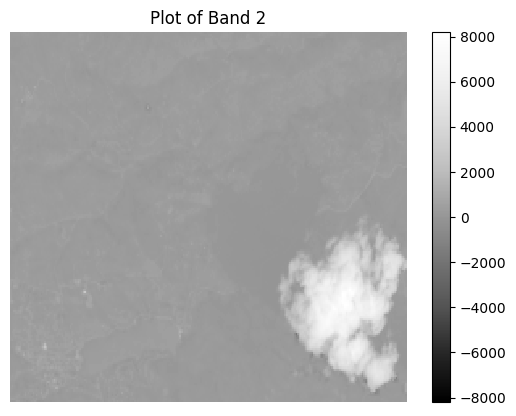

In [9]:
landsat_post_xr = open_clean_band(all_landsat_post_bands[0])

f, ax = plt.subplots()
landsat_post_xr.plot.imshow(cmap="Greys_r",
                            ax=ax)
ax.set_title("Plot of Band 2")
ax.set_axis_off()
plt.show()

In [8]:
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [9]:
landsat_crs = es.crs_check(all_landsat_post_bands[0])

print("Landsat crs is:", landsat_crs)
print("Fire boundary crs", fire_boundary.crs)

Landsat crs is: EPSG:32613
Fire boundary crs EPSG:4269


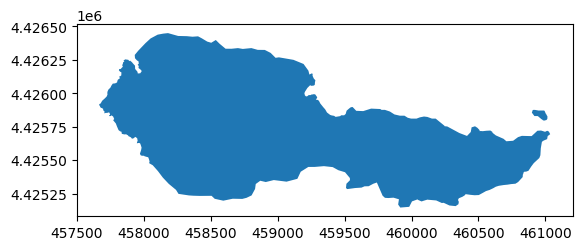

In [12]:
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)
fire_boundary_utmz13.plot()
plt.show()

In [10]:
landsat_post_xr_clip = rxr.open_rasterio(all_landsat_post_bands[0]).rio.clip(
    fire_boundary_utmz13.geometry,
    from_disk=True).squeeze()

NameError: name 'fire_boundary_utmz13' is not defined

In [14]:
landsat_post_xr_clip

<xarray.DataArray (y: 44, x: 113)> Size: 10kB
array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)
Coordinates:
  * x            (x) float64 904B 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 352B 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  8191
    STATISTICS_MEAN:     618.58594001194
    STATISTICS_MINIMUM:  -1674
    STATISTICS_STDDEV:   1183.5070695668
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -32768

NameError: name 'landsat_post_xr_clip' is not defined

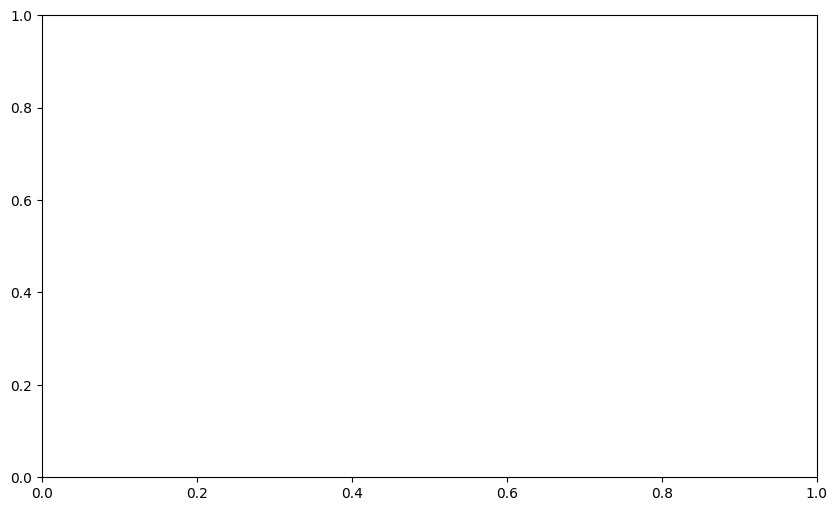

In [11]:
f, ax = plt.subplots(figsize=(10, 6))
landsat_post_xr_clip.plot.imshow(cmap="Greys_r",
                                 ax=ax)
ax.set_axis_off()
ax.set_title("Band 1")
plt.show()

In [13]:

all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[1-7]*.tif"))
all_landsat_post_bands.sort()
landsat_crs = es.crs_check(all_landsat_post_bands[0])
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [14]:
post_fire_stack = process_bands(all_landsat_post_bands, 
                                fire_boundary_utmz13, 
                                stack=True)
post_fire_stack.shape

NameError: name 'process_bands' is not defined

In [16]:
print("I tried the challenges but can't seem to figure it out!")

I tried the challenges but can't seem to figure it out!
